# Empirical Performance Analysis of Priority Queues

## Project Overview
This project empirically compares two classic priority queue implementations—
a binary heap and an unbalanced binary search tree—to understand how theoretical
time complexities translate into real-world performance.

The focus is on how different operation mixes and input patterns affect runtime
behavior, highlighting the importance of data structure choice in practice.

---

## Implementations
- **Binary Heap:** Implemented using Python’s built-in `heapq` module
- **Binary Search Tree:** Custom unbalanced BST supporting insert and delete-min

Both implementations expose identical interfaces to ensure fair comparison.

---

## Evaluation Approach
- Benchmarked mixed workloads with varying insert/delete ratios
- Used `time.perf_counter()` for high-resolution timing
- Ran 1,000 operations per workload on fresh instances
- Visualized results using bar charts and line plots

The evaluation emphasizes stability, degradation behavior, and alignment with
theoretical expectations.


In [ ]:
# This class implements a min-heap based priority queue using Python's heapq module
# It supports insert, find_min, and delete_min operations

import heapq

class HeapPriorityQueue:
    def __init__(self):
        self.heap = []

    def insert(self, value):
        heapq.heappush(self.heap, value)

    def find_min(self):
        return self.heap[0] if self.heap else None

    def delete_min(self):
        return heapq.heappop(self.heap) if self.heap else None


In [ ]:
# This class implements a basic unbalanced Binary Search Tree (BST) as a priority queue
# It also supports insert, find_min, and delete_min operations

class BSTNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BSTPriorityQueue:
    def __init__(self):
        self.root = None

    def insert(self, value):
        def _insert(node, value):
            if not node:
                return BSTNode(value)
            if value < node.value:
                node.left = _insert(node.left, value)
            else:
                node.right = _insert(node.right, value)
            return node
        self.root = _insert(self.root, value)

    def find_min(self):
        node = self.root
        if not node:
            return None
        while node.left:
            node = node.left
        return node.value

    def delete_min(self):
        def _delete_min(node):
            if not node.left:
                return node.right, node.value
            node.left, min_val = _delete_min(node.left)
            return node, min_val
        if self.root:
            self.root, min_val = _delete_min(self.root)
            return min_val
        return None


In [ ]:
# This function benchmarks a given PriorityQueue class (Heap or BST)
# by performing insert and delete operations based on a ratio (e.g., 70% insert)
# It returns the average time taken for each operation type

import time
import random

def run_benchmark(PQClass, num_ops=1000, insert_ratio=0.7, data='random'):
    pq = PQClass()
    ops = []
    results = {'insert': 0, 'delete_min': 0}

    for _ in range(num_ops):
        if random.random() < insert_ratio:
            val = random.randint(1, 1000000) if data == 'random' else _
            ops.append(('insert', val))
        else:
            ops.append(('delete_min', None))

    for op, val in ops:
        start = time.perf_counter()
        if op == 'insert':
            pq.insert(val)
        elif op == 'delete_min':
            pq.delete_min()
        end = time.perf_counter()
        results[op] += (end - start)

    return {k: v / num_ops for k, v in results.items()}


In [4]:

print("HeapPriorityQueue (70% inserts):", run_benchmark(HeapPriorityQueue, 1000, 0.7))
print("BSTPriorityQueue (70% inserts):", run_benchmark(BSTPriorityQueue, 1000, 0.7))
print("HeapPriorityQueue (50/50):", run_benchmark(HeapPriorityQueue, 1000, 0.5))
print("BSTPriorityQueue (50/50):", run_benchmark(BSTPriorityQueue, 1000, 0.5))


HeapPriorityQueue (70% inserts): {'insert': 1.9406183855608105e-07, 'delete_min': 1.033412991091609e-07}
BSTPriorityQueue (70% inserts): {'insert': 6.92506437189877e-07, 'delete_min': 4.339695704402402e-06}
HeapPriorityQueue (50/50): {'insert': 8.208202780224383e-08, 'delete_min': 1.0467792162671686e-07}
BSTPriorityQueue (50/50): {'insert': 6.968119414523244e-07, 'delete_min': 4.629781760741025e-07}


In [ ]:
# Plotting a line chart to compare average insert and delete times separately for both Heap and BST across different workload mixes

def detailed_operation_plot():
    mixes = [0.7, 0.5, 0.3]
    labels = ["70% insert", "50/50", "30% insert"]
    heap_insert = []
    heap_delete = []
    bst_insert = []
    bst_delete = []

    for mix in mixes:
        heap_result = run_benchmark(HeapPriorityQueue, 1000, mix)
        bst_result = run_benchmark(BSTPriorityQueue, 1000, mix)
        heap_insert.append(heap_result['insert'])
        heap_delete.append(heap_result['delete_min'])
        bst_insert.append(bst_result['insert'])
        bst_delete.append(bst_result['delete_min'])

    x = range(len(labels))
    plt.figure(figsize=(12,6))
    plt.plot(x, heap_insert, label="Heap - Insert", marker='o')
    plt.plot(x, heap_delete, label="Heap - Delete Min", marker='o')
    plt.plot(x, bst_insert, label="BST - Insert", marker='o')
    plt.plot(x, bst_delete, label="BST - Delete Min", marker='o')
    plt.xticks(x, labels)
    plt.ylabel("Avg time (s)")
    plt.title("Insert vs Delete Performance by Structure")
    plt.legend()
    plt.grid(True)
    plt.show()

import pandas as pd

def benchmark_table():
    mixes = [0.7, 0.5, 0.3]
    rows = []

    for mix in mixes:
        h = run_benchmark(HeapPriorityQueue, 1000, mix)
        b = run_benchmark(BSTPriorityQueue, 1000, mix)
        rows.append({
            "Mix": f"{int(mix*100)}/{int((1-mix)*100)}",
            "Heap Insert": h['insert'],
            "Heap Delete": h['delete_min'],
            "BST Insert": b['insert'],
            "BST Delete": b['delete_min']
        })

    df = pd.DataFrame(rows)
    return df


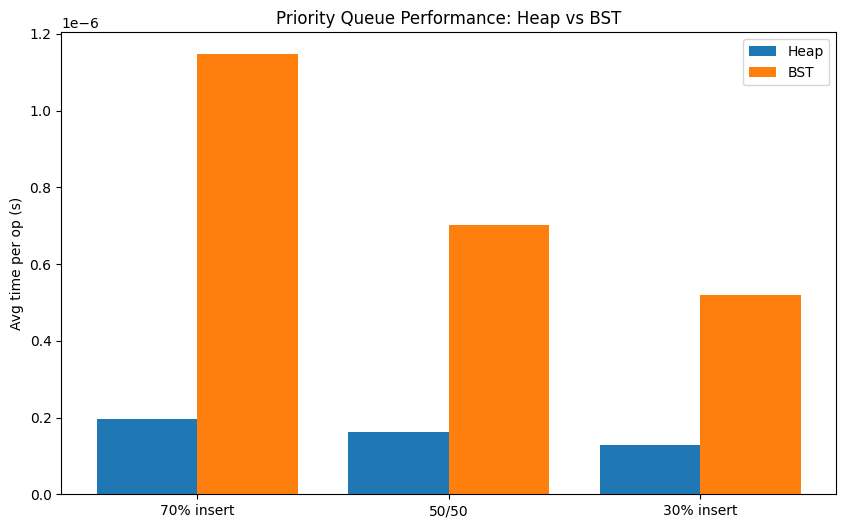

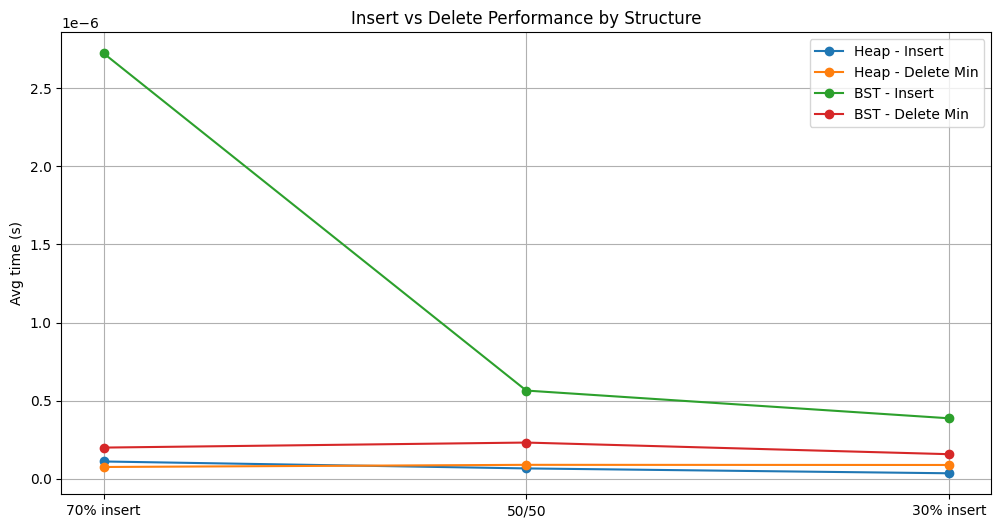

,Mix,Heap Insert,Heap Delete,BST Insert,BST Delete
0,70/30,1.165064e-07,7.101914e-08,8.469452e-07,3.219359e-07
1,50/50,7.721112e-08,9.142532e-08,2.367856e-07,5.252548e-07
2,30/70,4.214922e-08,9.050930e-08,9.922017e-08,1.607473e-07


In [ ]:
# Generate and show a bar chart comparing total average time per operation across different insert/delete mixes for both Heap and BST implementations

import matplotlib.pyplot as plt

def compare_queues():
    mixes = [0.7, 0.5, 0.3]
    heap_times = []
    bst_times = []

    for mix in mixes:
        heap_result = run_benchmark(HeapPriorityQueue, 1000, mix)
        bst_result = run_benchmark(BSTPriorityQueue, 1000, mix)
        heap_times.append(heap_result['insert'] + heap_result['delete_min'])
        bst_times.append(bst_result['insert'] + bst_result['delete_min'])

    x_labels = ["70% insert", "50/50", "30% insert"]
    x = range(len(x_labels))
    plt.figure(figsize=(10,6))
    plt.bar(x, heap_times, width=0.4, label='Heap', align='center')
    plt.bar([i + 0.4 for i in x], bst_times, width=0.4, label='BST', align='center')
    plt.xticks([i + 0.2 for i in x], x_labels)
    plt.ylabel("Avg time per op (s)")
    plt.title("Priority Queue Performance: Heap vs BST")
    plt.legend()
    plt.show()

compare_queues()

detailed_operation_plot()


df = benchmark_table()
df

